In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler

%matplotlib inline
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(10,7)
plt.rcParams['figure.dpi']=250
sns.set_style('darkgrid')

In [2]:
df=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [3]:
df=df.drop('ID#',axis=1)
df.describe()

Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3.999000e+03   3999.000000  3999.000000  3999.000000  3999.000000   
mean   7.360133e+04    144.114529     2.059515     1.014504     1.012253   
std    1.007757e+05    773.663804     1.376919     0.147650     0.195241   
min    0.000000e+00      0.000000     1.000000     1.000000     1.000000   
25%    1.852750e+04      0.000000     1.000000     1.000000     1.000000   
50%    4.309700e+04      0.000000     1.000000     1.000000     1.000000   
75%    9.240400e+04      0.000000     3.000000     1.000000     1.000000   
max    1.704838e+06  11148.000000     5.000000     3.000000     5.000000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count    3999.000000   3999.00000        3999.000000      3999.000000   
mean    17144.846212     11.60190         460.055764         1.373593   
std     24150.967826      9.60381        1400.209171         3.793172   
min         0.000000      0.00000           0.000000         0.000000   
25%      1250.000000      3.00000           0.000000         0.000000   
50%      7171.000000     12.00000           0.000000         0.000000   
75%     23800.500000     17.00000         311.000000         1.000000   
max    263685.000000     86.00000       30817.000000        53.000000   

       Days_since_enroll       Award?  
count         3999.00000  3999.000000  
mean          4118.55939     0.370343  
std           2065.13454     0.482957  
min              2.00000     0.000000  
25%           2330.00000     0.000000  
50%           4096.00000     0.000000  
75%           5790.50000     1.000000  
max           8296.00000     1.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [5]:
df.isna().sum() #Check Null Values

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
df.duplicated().value_counts()

False    3998
True        1
dtype: int64

In [7]:
#df.duplicated().sum()
df[df.duplicated()]

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
3876     1000           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
3876            0                  0                0               1597   

      Award?  
3876       0

In [8]:
df.drop_duplicates(inplace=True)
#df[df['Balance']==1000]

In [9]:
sc=StandardScaler()
x=sc.fit_transform(df)
x

array([[-4.51293870e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.39523468e+00, -7.67071631e-01],
       [-5.39604653e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.37973643e+00, -7.67071631e-01],
       [-3.20192202e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.41170157e+00, -7.67071631e-01],
       ...,
       [-2.23153612e-04, -1.86322793e-01,  6.82893866e-01, ...,
        -3.62219103e-01, -1.31599028e+00,  1.30365921e+00],
       [-1.85776026e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -9.85832074e-02, -1.31647460e+00, -7.67071631e-01],
       [-7.00646048e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01, -1.31792757e+00, -7.67071631e-01]])

# Hierachical Clutering Algorithm

In [10]:
from scipy.cluster import hierarchy

In [11]:
lk=hierarchy.linkage(x,method='complete')
dendrogram=hierarchy.dendrogram(lk)

In [12]:
from sklearn.cluster import AgglomerativeClustering

In [13]:
hc=AgglomerativeClustering(n_clusters=5)
y=hc.fit_predict(x)
np.unique(y) #Get LAble to each row

array([0, 1, 2, 3, 4], dtype=int64)

In [14]:
df_hc=pd.DataFrame(x,columns=df.columns)
df_hc['Cluster_Y']=y

In [15]:
df_hc['Cluster_Y']=y
df_hc.groupby('Cluster_Y').agg('mean')


Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
Cluster_Y                                                                       
0          0.421902    0.289053   1.046050  -0.098254  -0.062774     0.801352   
1         -0.270635   -0.174648  -0.592387  -0.098254  -0.062774    -0.508460   
2          0.607938    0.322070   0.269454  -0.098254  -0.062774     0.804699   
3         -0.047067   -0.156263  -0.668386   9.037110  -0.062774    -0.101837   
4          0.559019   -0.101445   0.965349  -0.098254  13.880131     2.861795   

           Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
Cluster_Y                                                                       
0             0.661742          -0.059827        -0.059677           0.281123   
1            -0.488892          -0.175169        -0.184521          -0.169010   
2             1.846860           3.896151         4.024277           0.232676   
3             0.617584           0.087457         0.220232          -0.072774   
4             1.522322          -0.027102        -0.010705           0.178999   

             Award?  
Cluster_Y            
0          0.610375  
1         -0.385109  
2          0.793941  
3          0.051589  
4          0.268294

In [16]:
df_hc['Cluster_Y'].value_counts()

1    2445
0    1362
2     130
3      43
4      18
Name: Cluster_Y, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


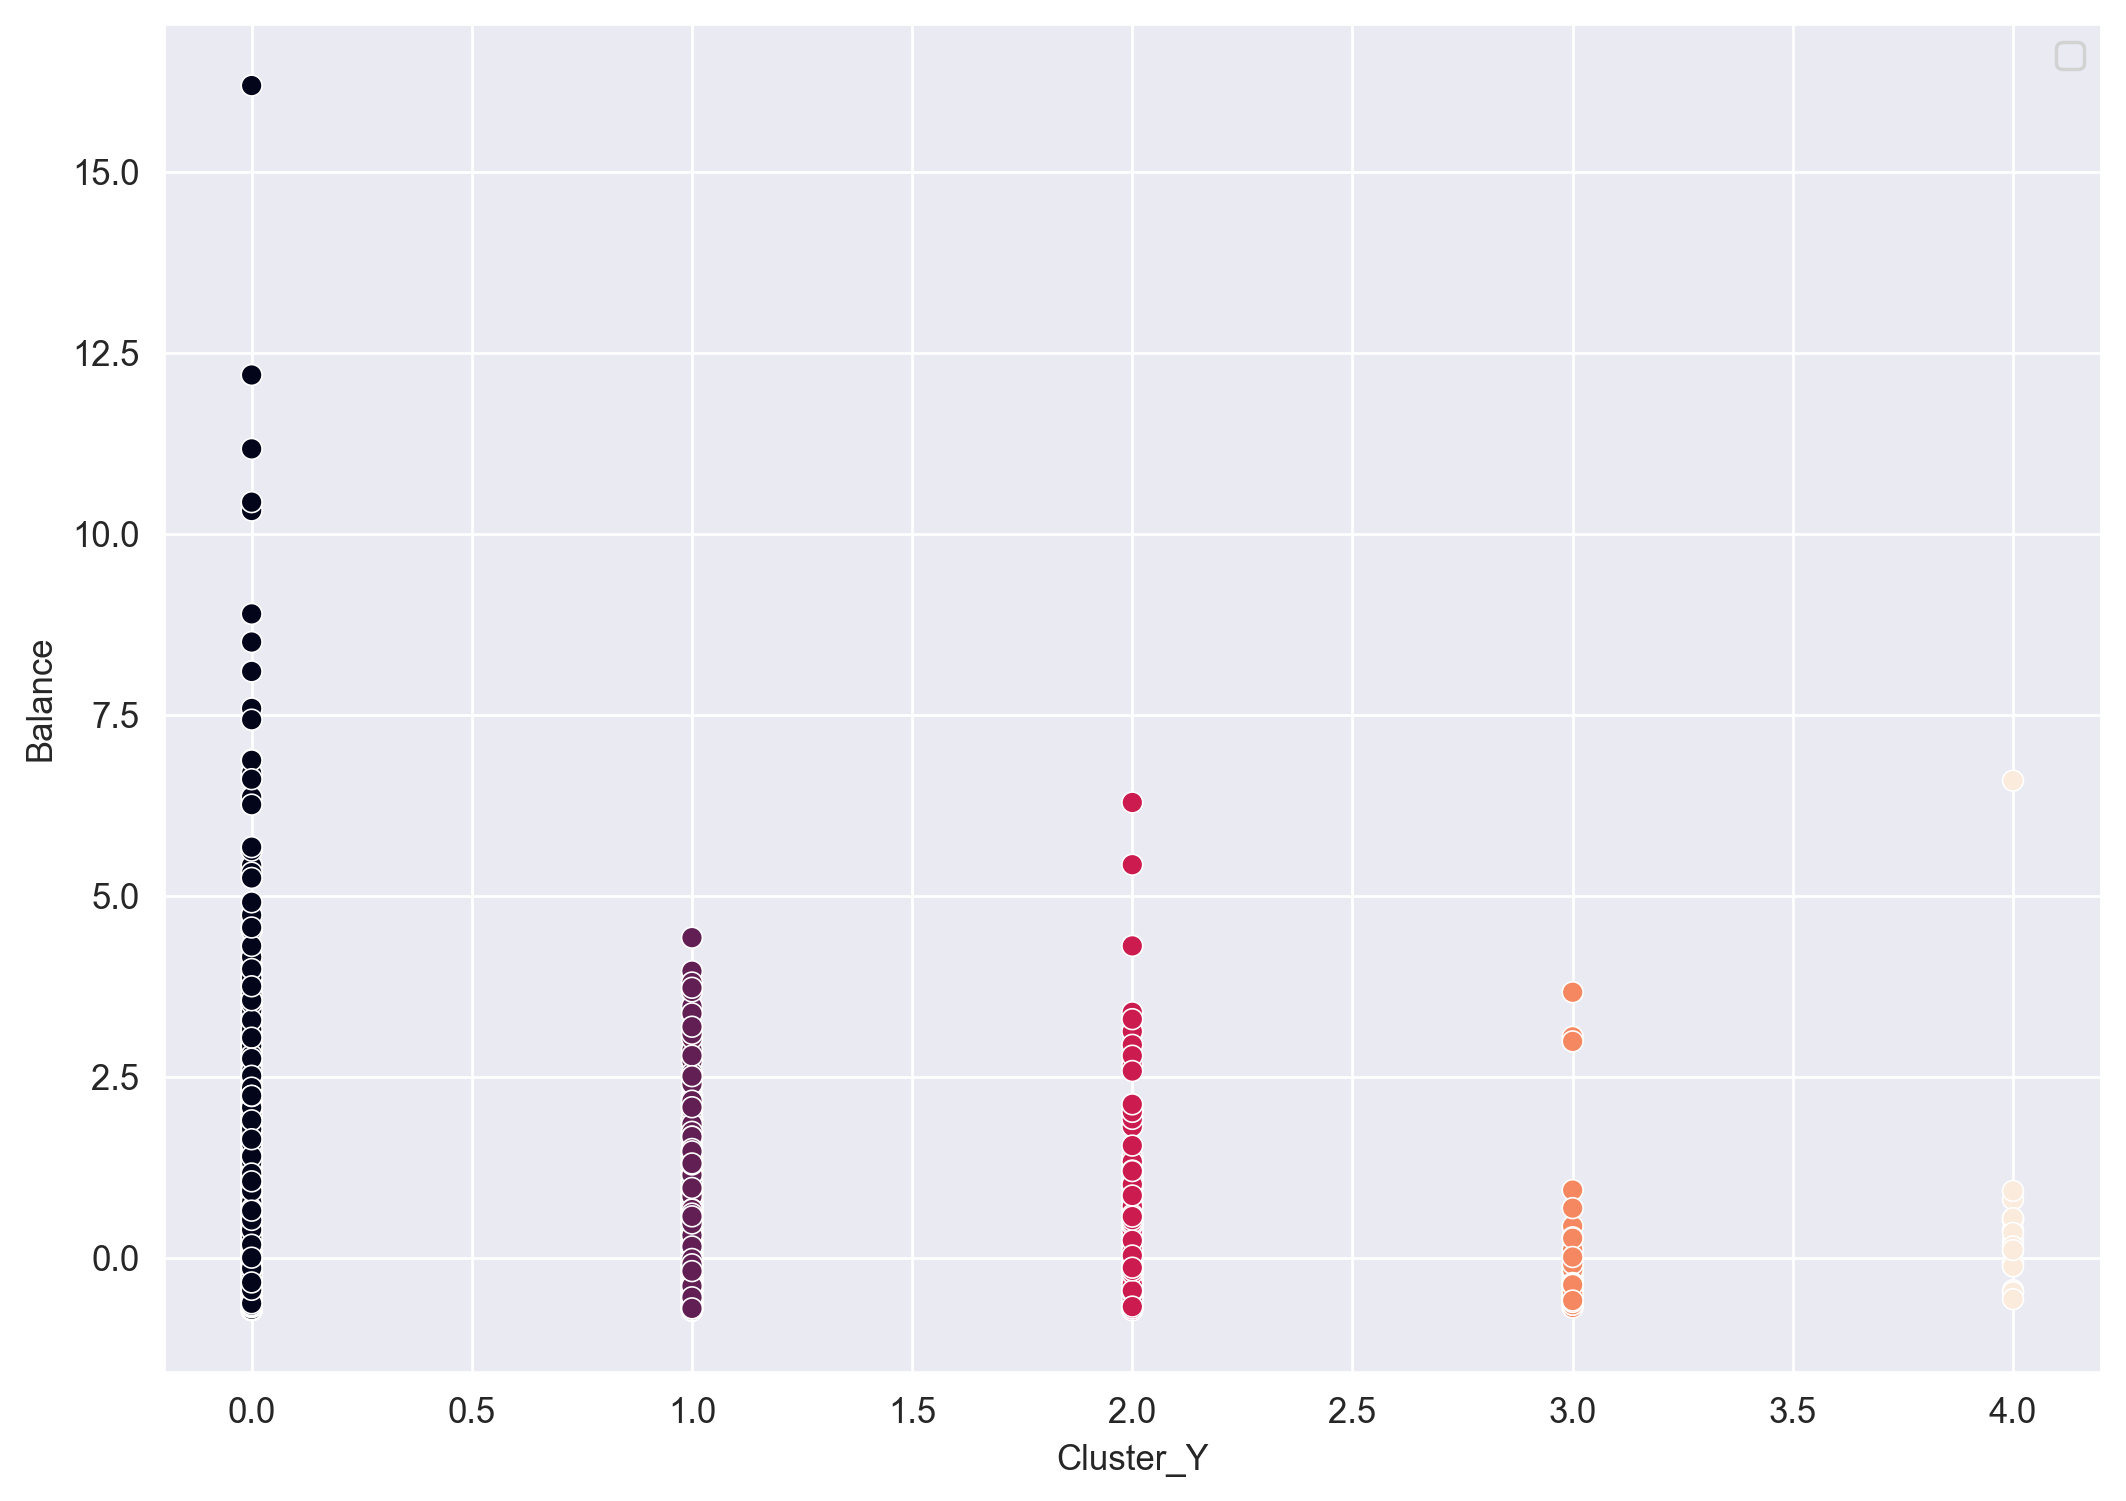

In [17]:
sns.scatterplot(df_hc['Cluster_Y'],df_hc['Balance'],c=df_hc['Cluster_Y'])
plt.legend()

# KMeans Clustering

In [18]:
from sklearn.cluster import KMeans

In [19]:
km=KMeans()
y=km.fit_predict(x)
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [20]:
km.cluster_centers_

array([[-3.87077478e-01, -1.43938592e-01, -5.86421153e-01,
        -9.82542913e-02, -6.27744600e-02, -5.26924315e-01,
        -5.16145659e-01, -2.21235560e-01, -2.43320000e-01,
        -9.84776116e-01, -7.67071631e-01],
       [-1.53322142e-01, -5.84059557e-02, -2.64899456e-01,
        -9.82542913e-02, -6.27744600e-02, -2.71832894e-01,
        -1.03873056e-01, -2.75371542e-02, -2.07943445e-02,
         6.55835577e-02,  1.30365921e+00],
       [ 1.24437893e+00,  4.86092753e-01,  2.36390118e-01,
        -9.82542913e-02, -6.27744600e-02,  8.04703542e-01,
         1.89953674e+00,  4.05482458e+00,  4.30327186e+00,
         3.11635525e-01,  9.30248734e-01],
       [-1.42027910e-01, -1.44225013e-01, -4.08798685e-01,
        -9.82542913e-02, -5.75480483e-02, -4.51933053e-01,
        -3.30255170e-01, -2.03667962e-01, -2.22599685e-01,
         7.30184840e-01, -7.67071631e-01],
       [ 6.39500591e-01, -8.44693245e-02,  1.02183982e+00,
        -9.82542913e-02,  1.56443349e+01,  3.17931660e+00,
  

In [21]:
df_km=pd.DataFrame(x,columns=df.columns)
df_km['km_Cluster_Y']=y
df_km

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    -0.451294   -0.186323  -0.769732  -0.098254  -0.062774    -0.702920   
1    -0.539605   -0.186323  -0.769732  -0.098254  -0.062774    -0.701223   
2    -0.320192   -0.186323  -0.769732  -0.098254  -0.062774    -0.539397   
3    -0.583944   -0.186323  -0.769732  -0.098254  -0.062774    -0.689421   
4     0.239483   -0.186323   1.409207  -0.098254  -0.062774     1.082876   
...        ...         ...        ...        ...        ...          ...   
3993 -0.547226   -0.186323  -0.769732  -0.098254  -0.062774    -0.357115   
3994 -0.091640   -0.186323  -0.769732  -0.098254  -0.062774    -0.669503   
3995 -0.000223   -0.186323   0.682894  -0.098254  -0.062774     0.343605   
3996 -0.185776   -0.186323  -0.769732  -0.098254  -0.062774    -0.689421   
3997 -0.700646   -0.186323  -0.769732  -0.098254  -0.062774    -0.710125   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0       -1.104430          -0.328649        -0.362219           1.395235   
1       -1.000286          -0.328649        -0.362219           1.379736   
2       -0.791997          -0.328649        -0.362219           1.411702   
3       -1.104430          -0.328649        -0.362219           1.371987   
4        1.499179           1.154721         0.692324           1.363754   
...           ...                ...              ...                ...   
3993    -0.791997          -0.185811        -0.098583          -1.315506   
3994    -0.687853          -0.328649        -0.362219          -1.319381   
3995    -0.375420          -0.328649        -0.362219          -1.315990   
3996    -1.104430           0.028446        -0.098583          -1.316475   
3997    -1.208575          -0.328649        -0.362219          -1.317928   

        Award?  km_Cluster_Y  
0    -0.767072             3  
1    -0.767072             3  
2    -0.767072             3  
3    -0.767072             3  
4     1.303659             6  
...        ...           ...  
3993  1.303659             1  
3994  1.303659             1  
3995  1.303659             1  
3996 -0.767072             0  
3997 -0.767072             0  

[3998 rows x 12 columns]

In [22]:
df_km['km_Cluster_Y'].value_counts()

0    1153
3     980
6     820
1     810
2     122
7      55
5      43
4      15
Name: km_Cluster_Y, dtype: int64

<AxesSubplot:xlabel='km_Cluster_Y', ylabel='Balance'>

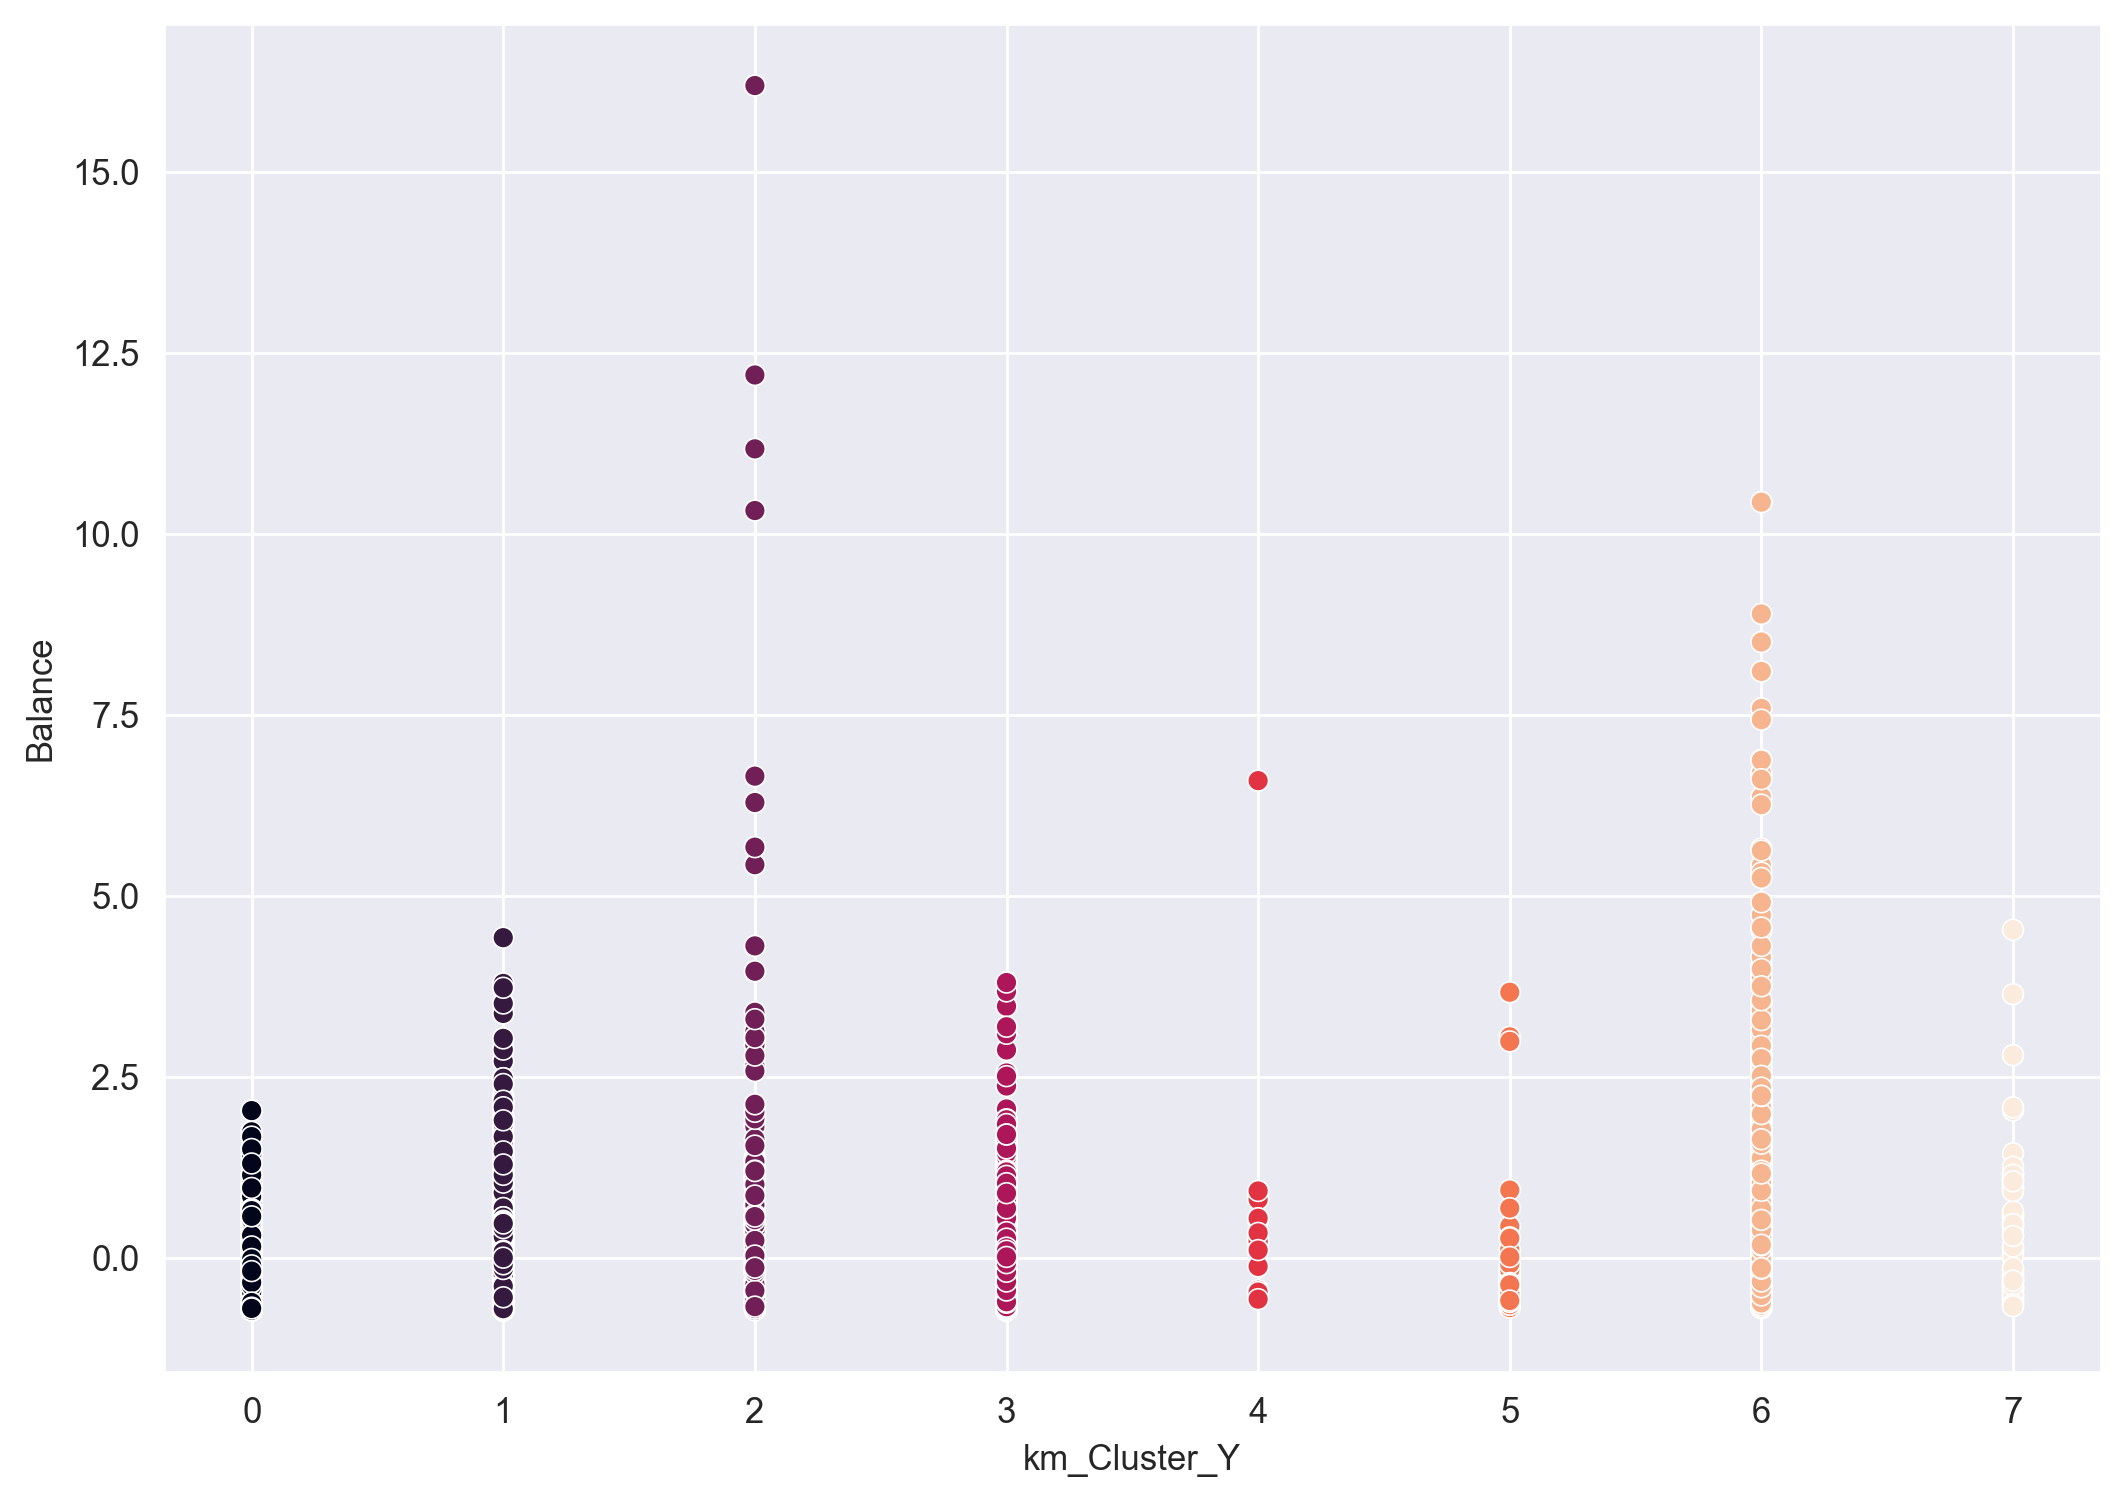

In [23]:
sns.scatterplot(df_km['km_Cluster_Y'],df_km['Balance'],c=df_km['km_Cluster_Y'])

In [24]:
x

array([[-4.51293870e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.39523468e+00, -7.67071631e-01],
       [-5.39604653e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.37973643e+00, -7.67071631e-01],
       [-3.20192202e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.41170157e+00, -7.67071631e-01],
       ...,
       [-2.23153612e-04, -1.86322793e-01,  6.82893866e-01, ...,
        -3.62219103e-01, -1.31599028e+00,  1.30365921e+00],
       [-1.85776026e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -9.85832074e-02, -1.31647460e+00, -7.67071631e-01],
       [-7.00646048e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01, -1.31792757e+00, -7.67071631e-01]])

# Elbow Graph

In [25]:
x1=df_km.iloc[:,:-1]
x1

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    -0.451294   -0.186323  -0.769732  -0.098254  -0.062774    -0.702920   
1    -0.539605   -0.186323  -0.769732  -0.098254  -0.062774    -0.701223   
2    -0.320192   -0.186323  -0.769732  -0.098254  -0.062774    -0.539397   
3    -0.583944   -0.186323  -0.769732  -0.098254  -0.062774    -0.689421   
4     0.239483   -0.186323   1.409207  -0.098254  -0.062774     1.082876   
...        ...         ...        ...        ...        ...          ...   
3993 -0.547226   -0.186323  -0.769732  -0.098254  -0.062774    -0.357115   
3994 -0.091640   -0.186323  -0.769732  -0.098254  -0.062774    -0.669503   
3995 -0.000223   -0.186323   0.682894  -0.098254  -0.062774     0.343605   
3996 -0.185776   -0.186323  -0.769732  -0.098254  -0.062774    -0.689421   
3997 -0.700646   -0.186323  -0.769732  -0.098254  -0.062774    -0.710125   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0       -1.104430          -0.328649        -0.362219           1.395235   
1       -1.000286          -0.328649        -0.362219           1.379736   
2       -0.791997          -0.328649        -0.362219           1.411702   
3       -1.104430          -0.328649        -0.362219           1.371987   
4        1.499179           1.154721         0.692324           1.363754   
...           ...                ...              ...                ...   
3993    -0.791997          -0.185811        -0.098583          -1.315506   
3994    -0.687853          -0.328649        -0.362219          -1.319381   
3995    -0.375420          -0.328649        -0.362219          -1.315990   
3996    -1.104430           0.028446        -0.098583          -1.316475   
3997    -1.208575          -0.328649        -0.362219          -1.317928   

        Award?  
0    -0.767072  
1    -0.767072  
2    -0.767072  
3    -0.767072  
4     1.303659  
...        ...  
3993  1.303659  
3994  1.303659  
3995  1.303659  
3996 -0.767072  
3997 -0.767072  

[3998 rows x 11 columns]

In [26]:
wcss=[]
df_km
for i in range(1,75):
    km=KMeans(n_clusters=i)
    y=km.fit_predict(x)
    wcss.append(km.inertia_)

In [27]:
wcss

[43978.00000000004,
 35402.34837621175,
 30893.08726587973,
 27150.01905574157,
 24347.367107866092,
 21088.408074423303,
 19163.157366353273,
 17320.435601584053,
 15957.891083602732,
 14728.767984860178,
 13703.65570368959,
 13161.673933704691,
 12493.276971099753,
 11975.998224857129,
 11454.453795071388,
 11218.758328283293,
 10841.675654086914,
 10466.990520794237,
 10041.858972762493,
 9867.836743205782,
 9502.76232531179,
 9111.828610656381,
 8971.58541976393,
 8711.631982873376,
 8475.846236255613,
 8410.853664371967,
 8178.16710571064,
 8097.941180595152,
 7917.203722732869,
 7725.7178663775285,
 7625.13610865461,
 7563.033966402596,
 7385.652455100082,
 7277.220200656753,
 7173.37566726357,
 7068.230640783315,
 6973.383611098382,
 6869.841943200121,
 6738.107620223558,
 6707.583288310098,
 6620.095868667682,
 6487.085946463888,
 6441.993275804058,
 6412.076700180993,
 6306.515705959234,
 6211.740902306864,
 6103.701795366716,
 6072.566462370147,
 6019.250474196726,
 5964.0159

Text(0, 0.5, 'wcss')

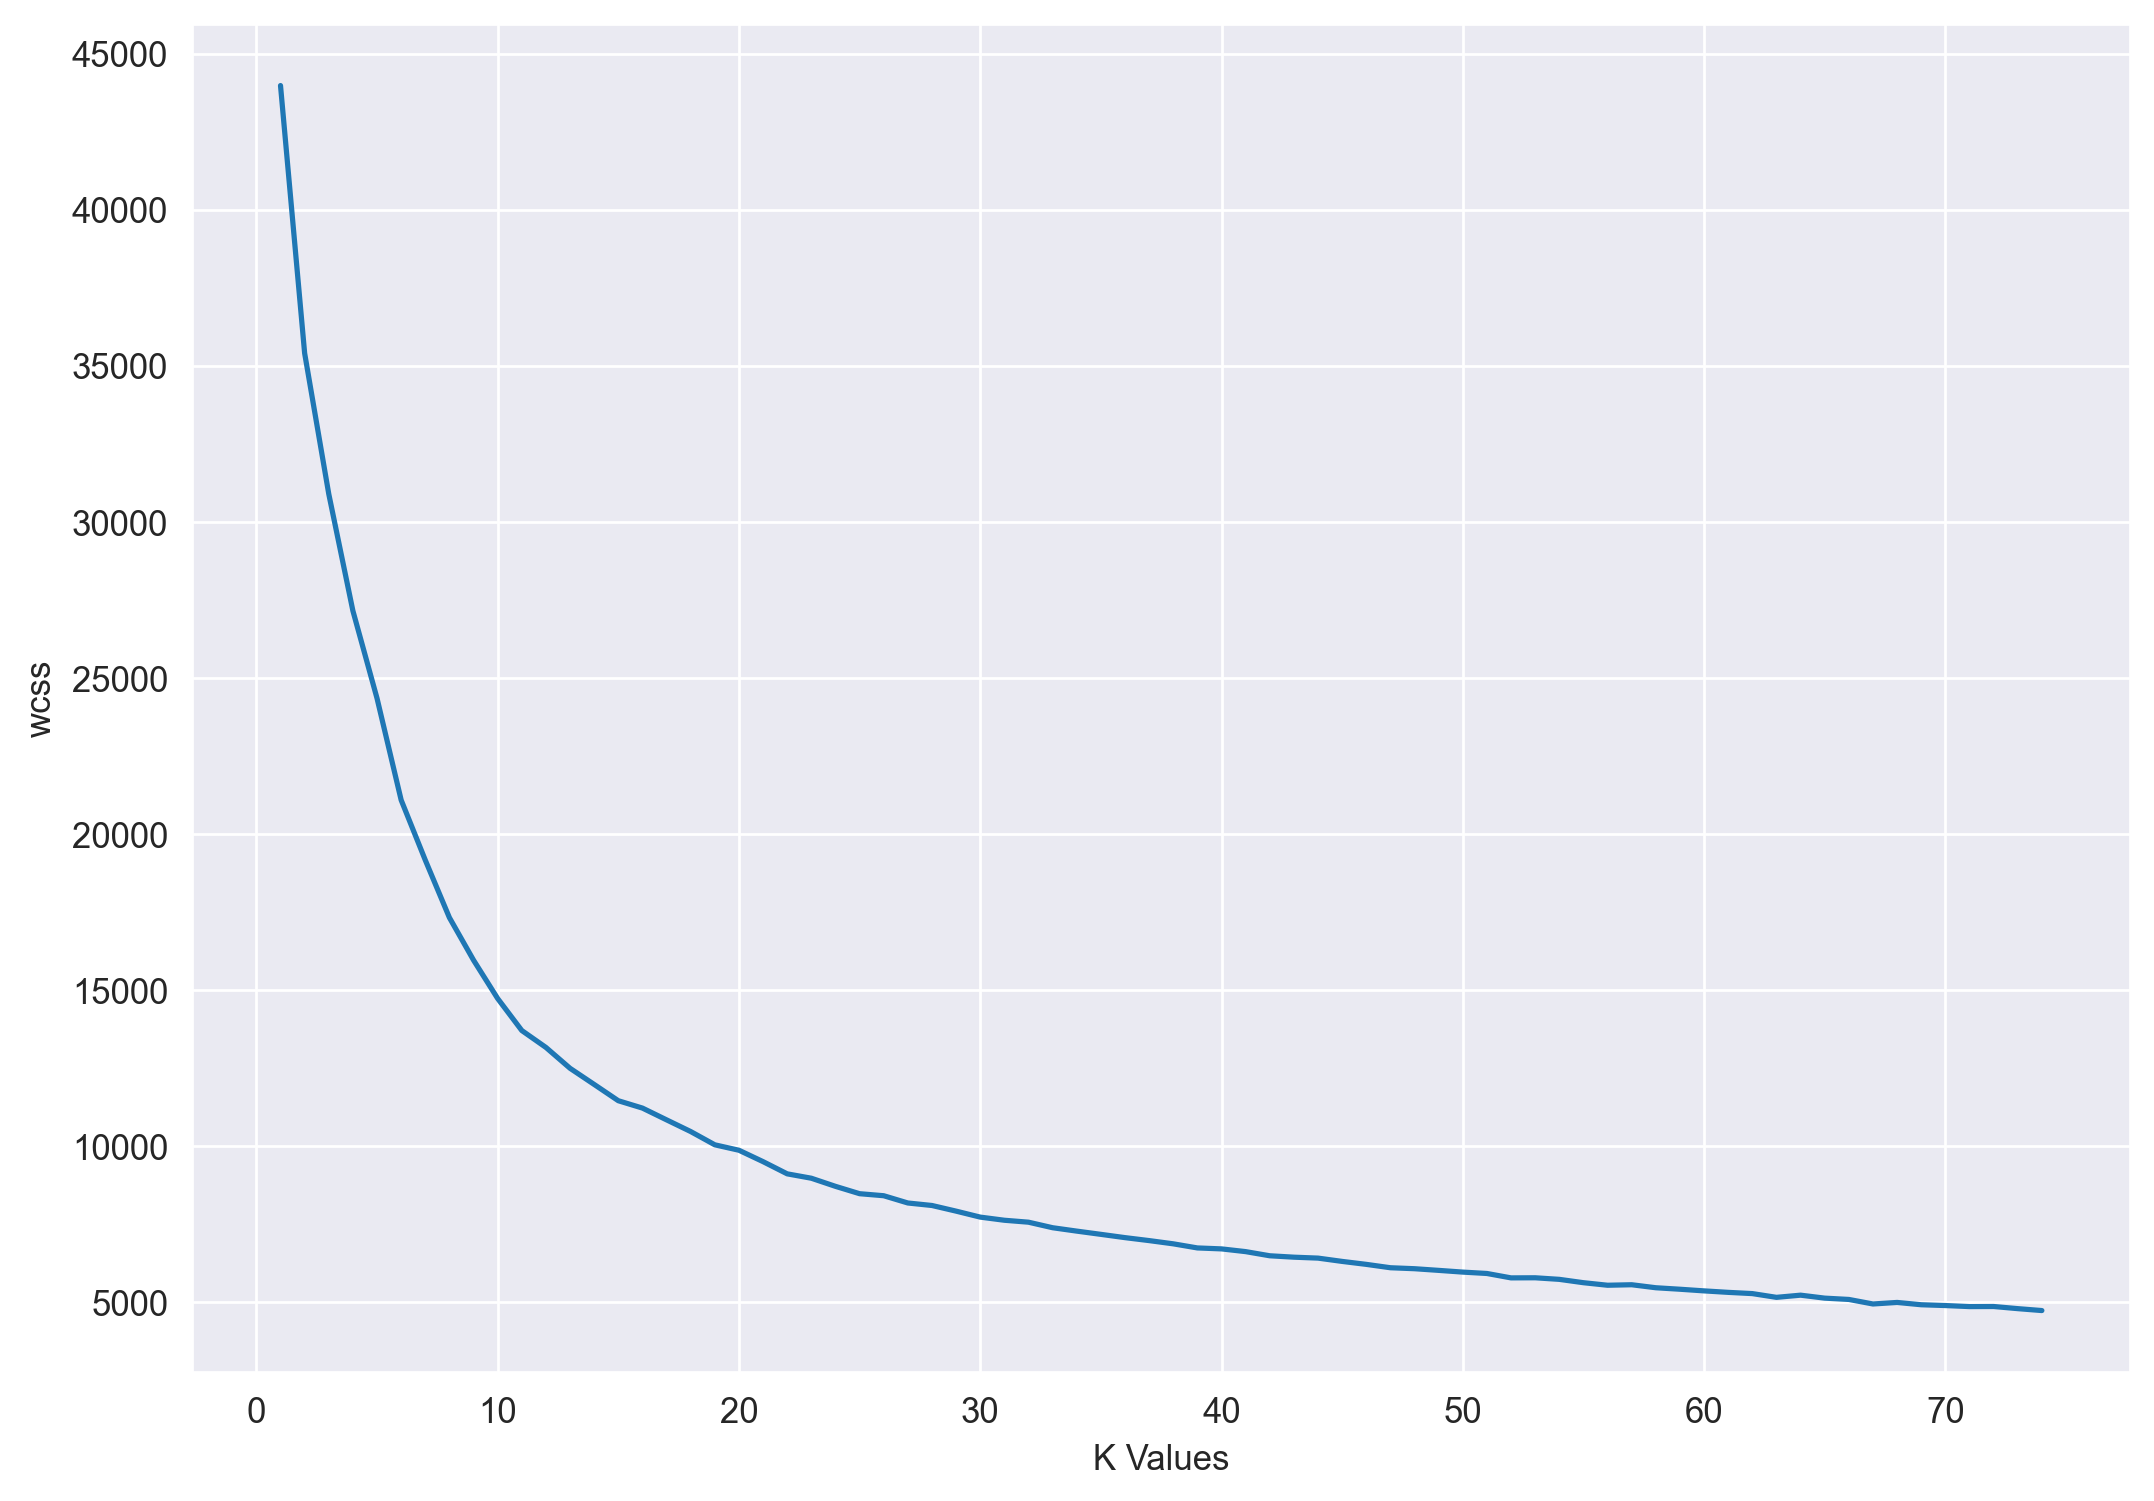

In [28]:
plt.plot(range(1,75),wcss)
plt.xlabel('K Values')
plt.ylabel('wcss')

In [29]:
km=KMeans(n_clusters=20) 
y=km.fit_predict(x)
y

array([ 7,  7,  7, ..., 14,  4,  4])

In [30]:
df_km=pd.DataFrame(x,columns=df.columns)
df_km['km_Cluste']=y
df_km

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    -0.451294   -0.186323  -0.769732  -0.098254  -0.062774    -0.702920   
1    -0.539605   -0.186323  -0.769732  -0.098254  -0.062774    -0.701223   
2    -0.320192   -0.186323  -0.769732  -0.098254  -0.062774    -0.539397   
3    -0.583944   -0.186323  -0.769732  -0.098254  -0.062774    -0.689421   
4     0.239483   -0.186323   1.409207  -0.098254  -0.062774     1.082876   
...        ...         ...        ...        ...        ...          ...   
3993 -0.547226   -0.186323  -0.769732  -0.098254  -0.062774    -0.357115   
3994 -0.091640   -0.186323  -0.769732  -0.098254  -0.062774    -0.669503   
3995 -0.000223   -0.186323   0.682894  -0.098254  -0.062774     0.343605   
3996 -0.185776   -0.186323  -0.769732  -0.098254  -0.062774    -0.689421   
3997 -0.700646   -0.186323  -0.769732  -0.098254  -0.062774    -0.710125   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0       -1.104430          -0.328649        -0.362219           1.395235   
1       -1.000286          -0.328649        -0.362219           1.379736   
2       -0.791997          -0.328649        -0.362219           1.411702   
3       -1.104430          -0.328649        -0.362219           1.371987   
4        1.499179           1.154721         0.692324           1.363754   
...           ...                ...              ...                ...   
3993    -0.791997          -0.185811        -0.098583          -1.315506   
3994    -0.687853          -0.328649        -0.362219          -1.319381   
3995    -0.375420          -0.328649        -0.362219          -1.315990   
3996    -1.104430           0.028446        -0.098583          -1.316475   
3997    -1.208575          -0.328649        -0.362219          -1.317928   

        Award?  km_Cluste  
0    -0.767072          7  
1    -0.767072          7  
2    -0.767072          7  
3    -0.767072          7  
4     1.303659         16  
...        ...        ...  
3993  1.303659         14  
3994  1.303659         14  
3995  1.303659         14  
3996 -0.767072          4  
3997 -0.767072          4  

[3998 rows x 12 columns]

<AxesSubplot:xlabel='km_Cluste', ylabel='Balance'>

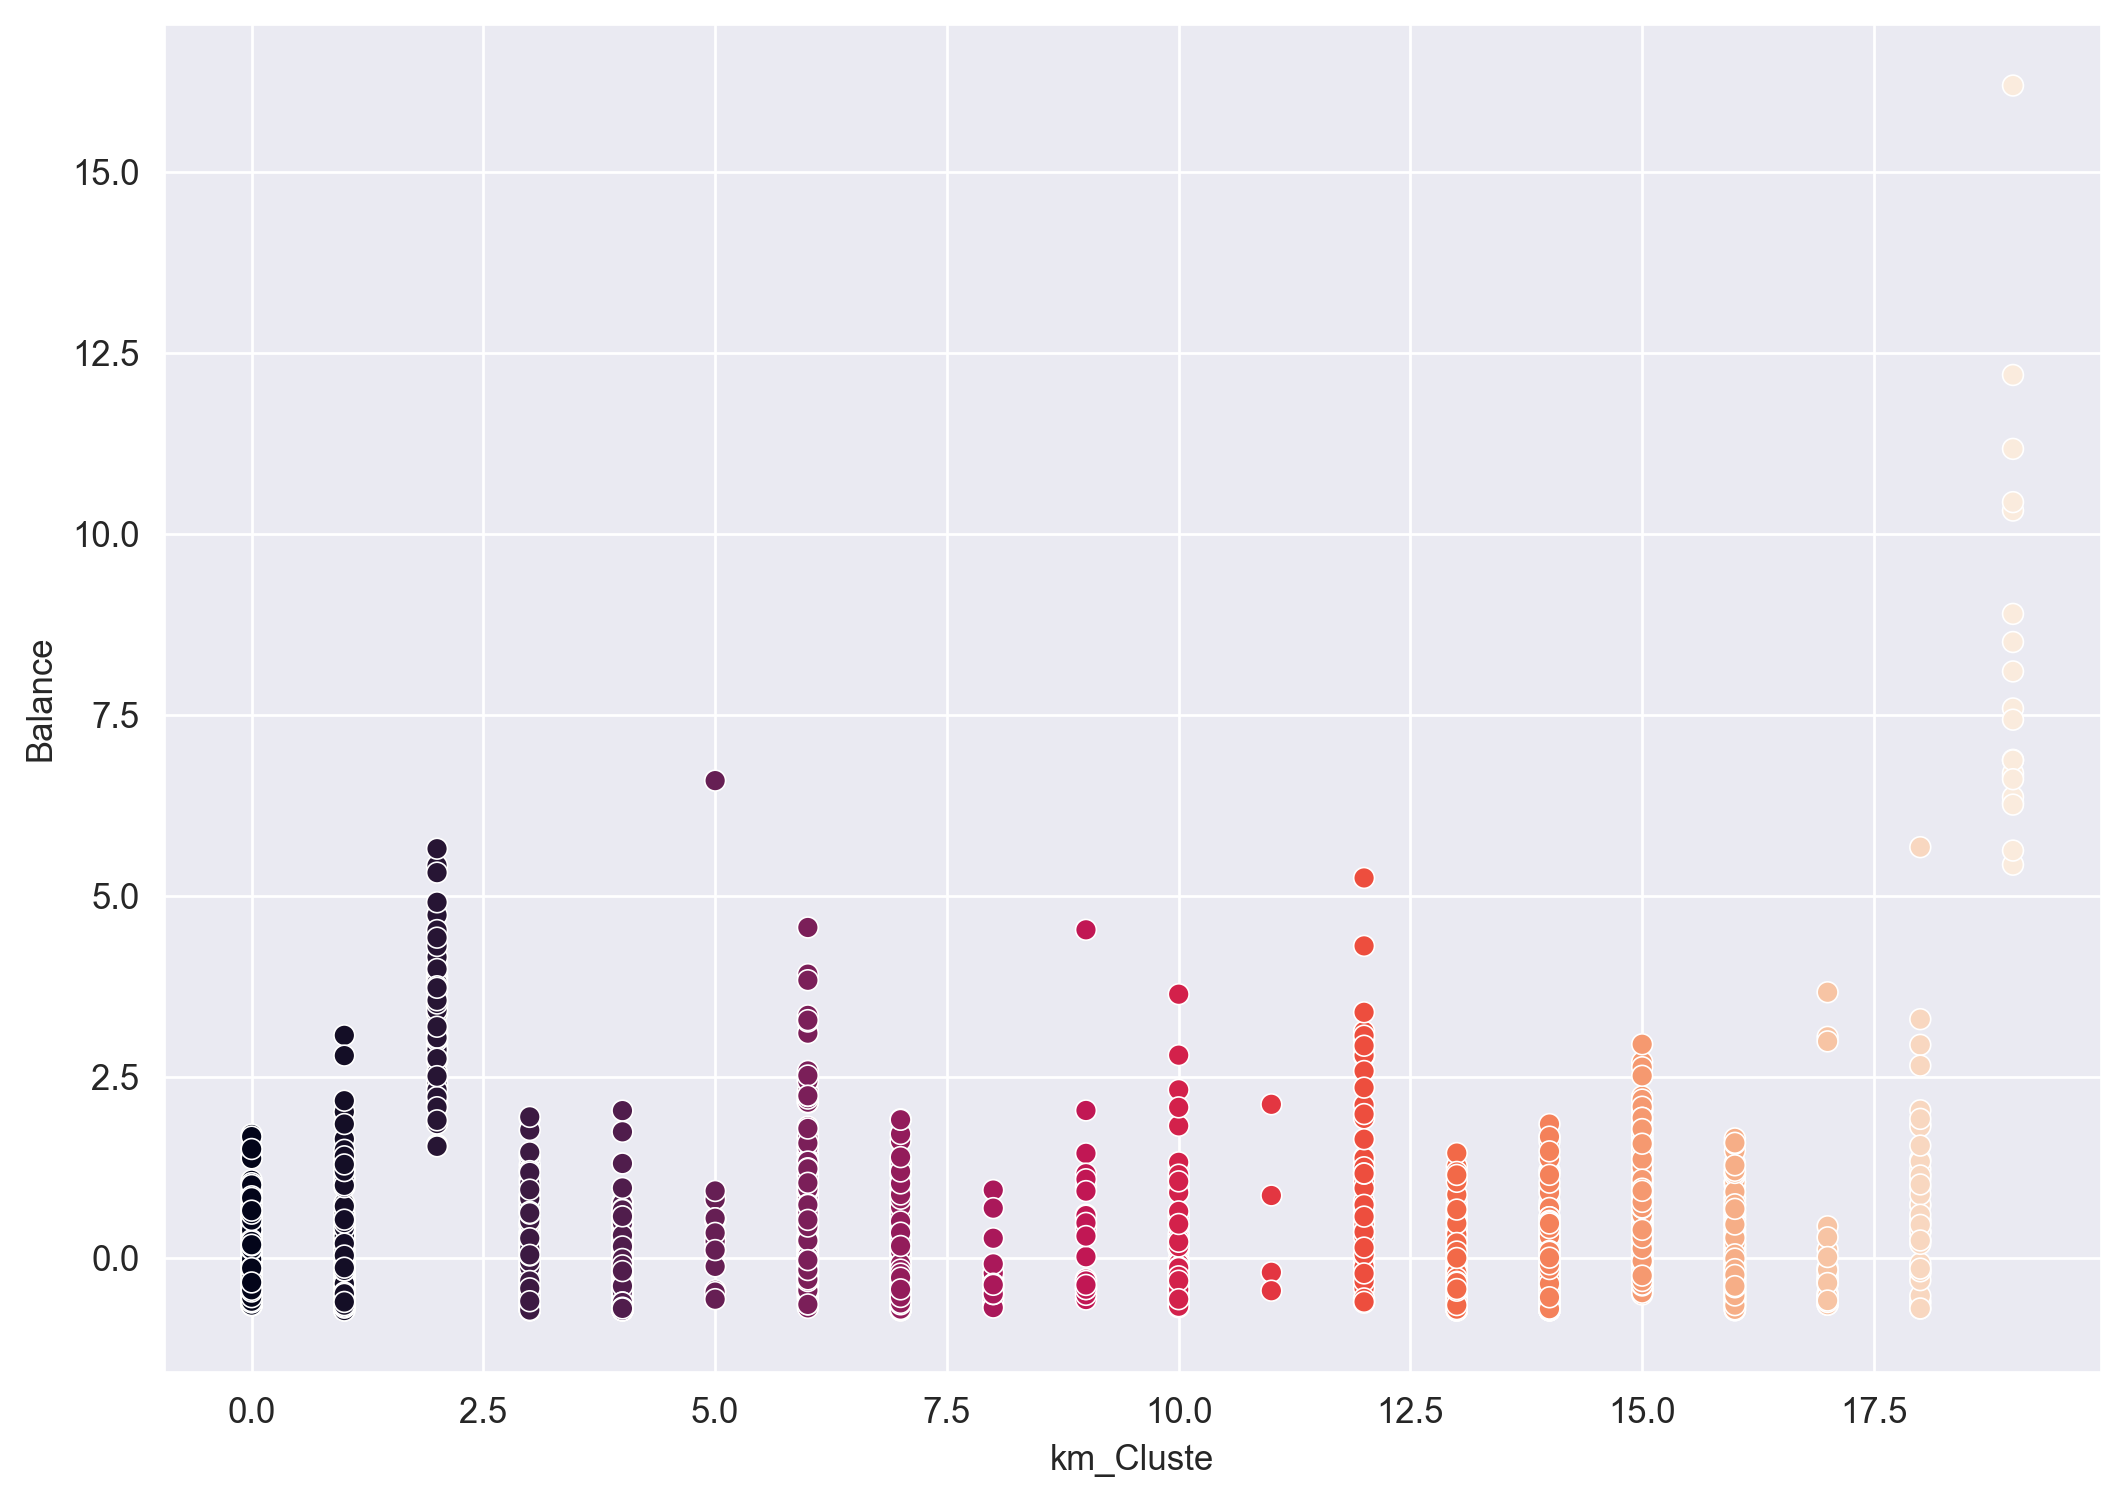

In [31]:
sns.scatterplot(df_km['km_Cluste'],df_km['Balance'],c=df_km['km_Cluste'])

In [32]:
#df_hc.groupby('Cluster_Y').agg('mean')
df_km.groupby('km_Cluste').agg('mean')

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
km_Cluste                                                                       
0         -0.129426   -0.170480   0.049056  -0.098254  -0.062774    -0.168600   
1          0.110546    0.061917  -0.527627  -0.098254  -0.062774    -0.210375   
2          3.168641   -0.013616   0.174475  -0.098254  -0.062774     0.229040   
3         -0.212408   -0.088078  -0.650174  -0.098254  -0.062774    -0.456938   
4         -0.465547   -0.161628  -0.758506  -0.098254  -0.062774    -0.624253   
5          0.639501   -0.084469   1.021840  -0.098254  15.644335     3.179317   
6          0.658754   -0.082427   2.044730  -0.098254  -0.036098     2.479602   
7         -0.198699   -0.169093  -0.635161  -0.098254  -0.049775    -0.561037   
8         -0.212248   -0.100152  -0.769732  13.447286  -0.062774     0.135048   
9          0.456316    9.316813  -0.217734  -0.098254  -0.062774    -0.117998   
10         0.177163    3.989172   0.001277  -0.098254  -0.062774     0.020685   
11         0.579344    0.262194   0.319737  -0.098254  -0.062774     2.007711   
12         1.248982    0.220043   1.732012  -0.098254  -0.062774     2.698849   
13        -0.398488   -0.166612  -0.751883  -0.098254  -0.062774    -0.627104   
14        -0.282923   -0.146063  -0.529408  -0.098254  -0.062774    -0.404498   
15         0.472297   -0.176546   1.202473  -0.098254  -0.049873     0.657581   
16        -0.105320   -0.141342   1.064058  -0.098254  -0.062774     0.540184   
17         0.041423   -0.186323  -0.614093   6.674516  -0.062774    -0.228739   
18         0.782966    0.542248   0.021142  -0.098254  -0.062774     0.595450   
19         8.222683    0.507134   0.973419  -0.098254  -0.062774     1.723289   

           Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
km_Cluste                                                                       
0             0.635084          -0.245985        -0.274807          -0.748079   
1             0.456946           2.031902         2.024485          -0.139807   
2             0.251182           0.274198         0.305658           0.847218   
3            -0.470564          -0.112993        -0.110517           0.892429   
4            -0.829502          -0.255690        -0.269315          -1.214632   
5             1.714410           0.033207         0.059598           0.239582   
6             1.087483          -0.090292        -0.060136           0.689207   
7            -0.433043          -0.219197        -0.235754           1.232027   
8             0.763225           0.166046         0.481416          -0.021144   
9            -0.012997           0.546689         0.576325           0.219421   
10           -0.051771           0.000834         0.002815          -0.261171   
11            6.003422          13.926557        12.621849          -0.929382   
12            2.413335           2.142550         2.337608           0.613766   
13           -0.843774          -0.256247        -0.269523           0.078305   
14           -0.384992          -0.161823        -0.145107          -0.753880   
15            0.526727          -0.211596        -0.242686           0.495257   
16            0.656341          -0.152851        -0.172663           0.244310   
17            0.539563           0.045357         0.080313          -0.100433   
18            2.158759           5.279795         5.718982           0.146356   
19            1.113844           0.762024         1.325051           1.234561   

             Award?  
km_Cluste            
0         -0.761579  
1          0.550666  
2          0.647928  
3          1.303659  
4         -0.767072  
5          0.337318  
6          1.131098  
7         -0.767072  
8          0.061221  
9          0.558196  
10         0.220508  
11         1.303659  
12         1.035231  
13        -0.767072  
14         1.303659  
15        -0.767072  
16         1.303659  
17         0.046430  
18    

# DBScan Cluter

In [33]:
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3998 rows x 11 columns]

In [34]:
x

array([[-4.51293870e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.39523468e+00, -7.67071631e-01],
       [-5.39604653e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.37973643e+00, -7.67071631e-01],
       [-3.20192202e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.41170157e+00, -7.67071631e-01],
       ...,
       [-2.23153612e-04, -1.86322793e-01,  6.82893866e-01, ...,
        -3.62219103e-01, -1.31599028e+00,  1.30365921e+00],
       [-1.85776026e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -9.85832074e-02, -1.31647460e+00, -7.67071631e-01],
       [-7.00646048e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01, -1.31792757e+00, -7.67071631e-01]])

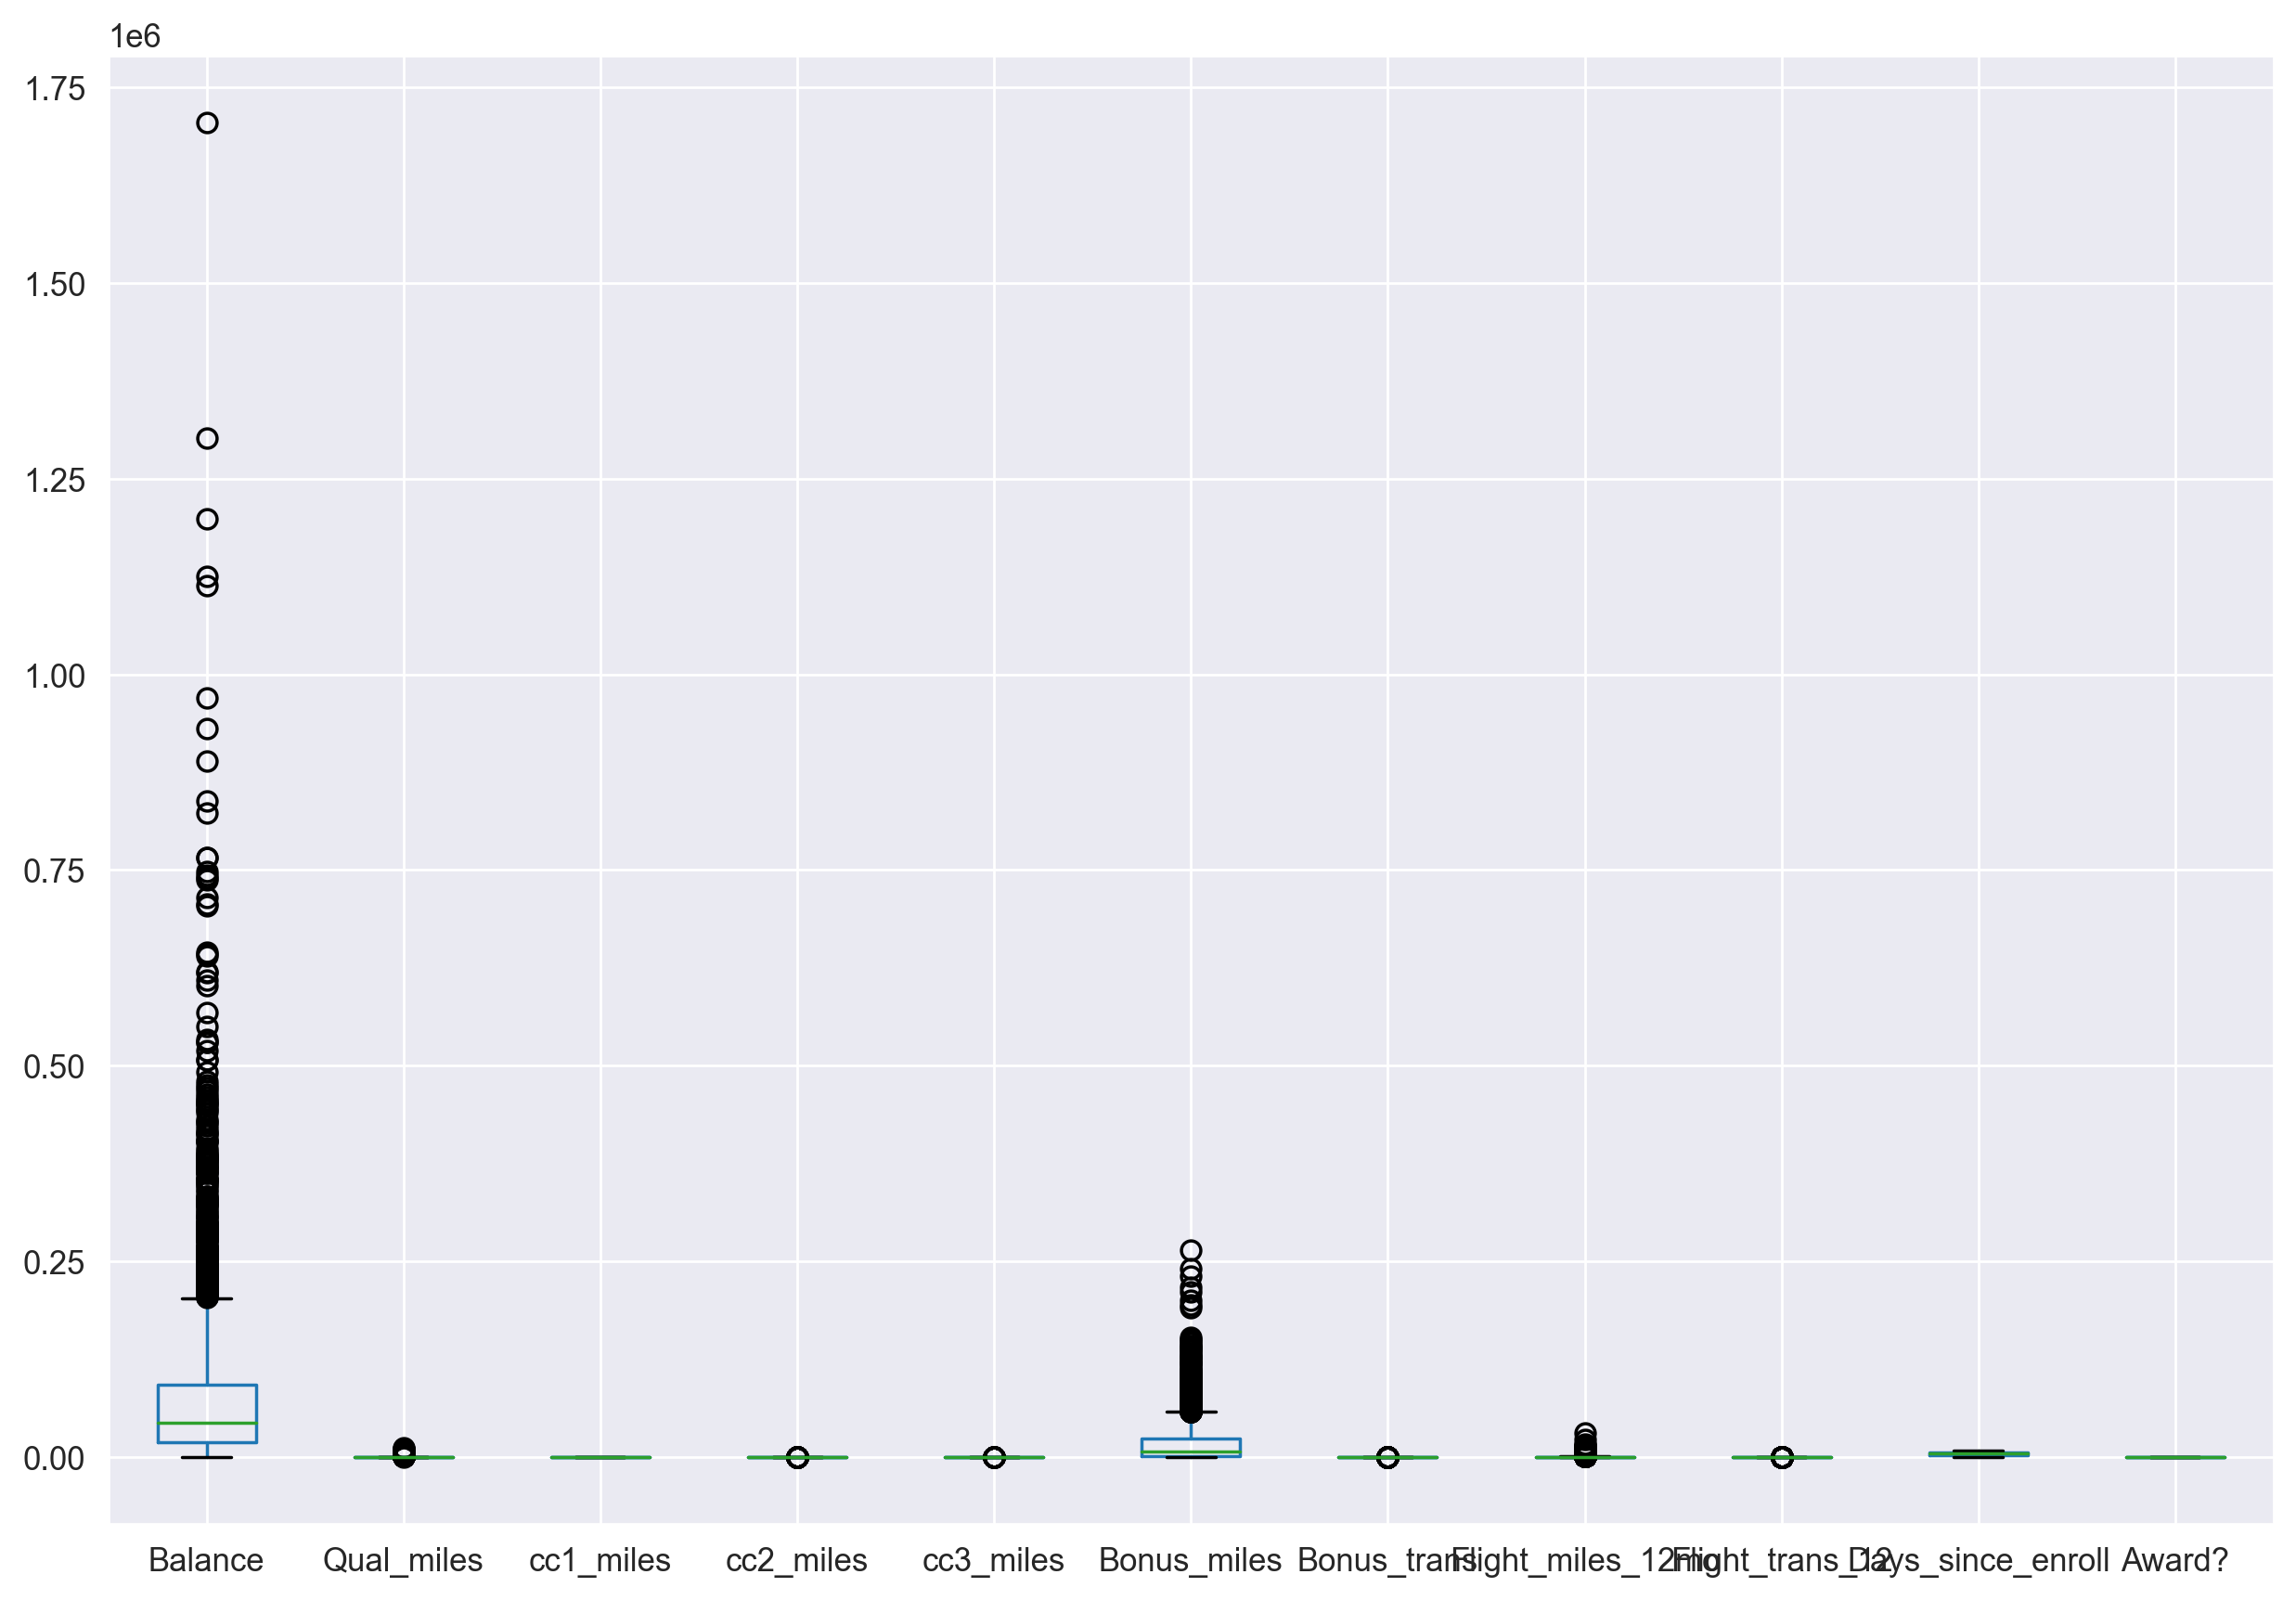

In [35]:
df.boxplot()
plt.tight_layout()

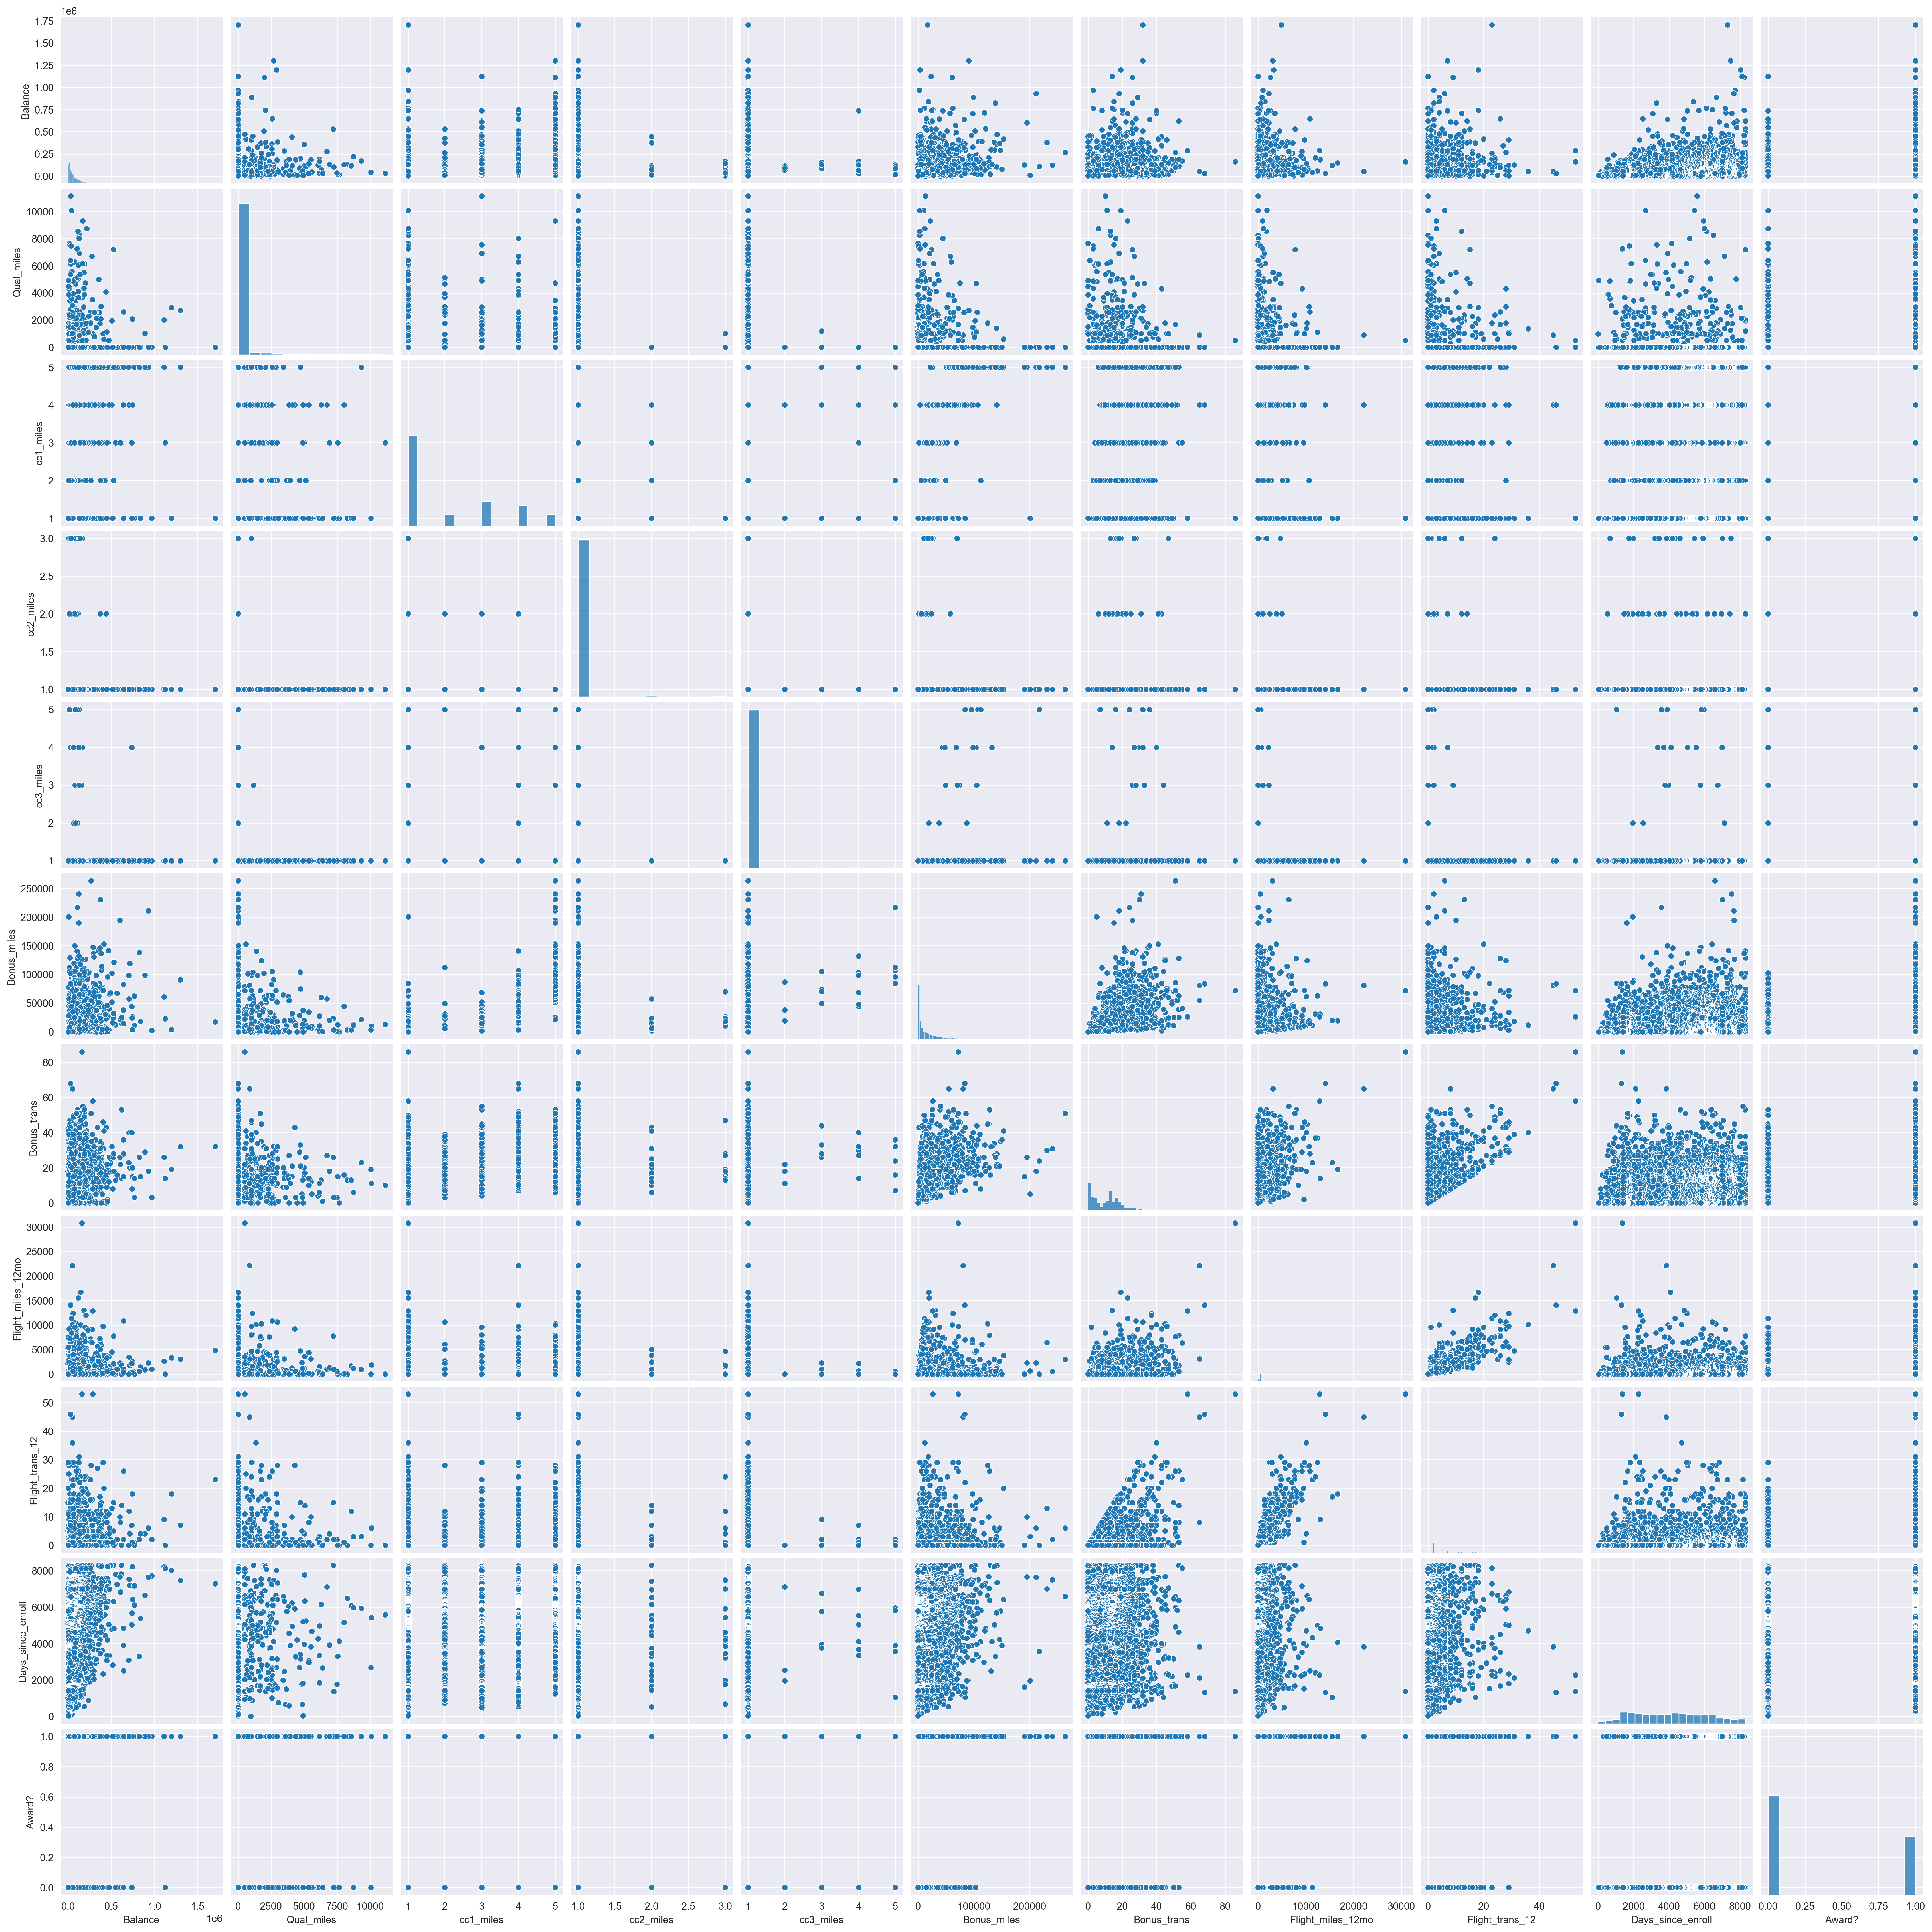

In [36]:
sns.pairplot(df)

In [69]:
from sklearn.cluster import DBSCAN

In [220]:
db=DBSCAN(eps=7,min_samples=3) #default value 0.5,3
db.fit(x)

DBSCAN(eps=7, min_samples=3)

In [215]:
np.unique(db.labels_)

array([-1,  0], dtype=int64)

In [216]:
from sklearn.metrics import silhouette_score

In [222]:
silhouette_score(x,db.labels_) #SAme Evaluation for hc, kmeans, dbscan algo

0.8562622335599249

In [223]:
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3998 rows x 11 columns]

In [226]:
df['Y']=db.labels_

In [228]:
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  Y  
0          0  0  
1          0  0  
2          0  0  
3          0  0  
4          1  0  
...      ... ..  
3994       1  0  
3995       1  0  
3996       1  0  
3997       0  0  
3998       0  0  

[3998 rows x 12 columns]

In [229]:
df[df['Y']==0]

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  Y  
0          0  0  
1          0  0  
2          0  0  
3          0  0  
4          1  0  
...      ... ..  
3994       1  0  
3995       1  0  
3996       1  0  
3997       0  0  
3998       0  0  

[3997 rows x 12 columns]

In [230]:
df.groupby('Y').agg('mean')

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles   Bonus_miles  \
Y                                                                              
-1  160114.000000  500.000000   1.000000   1.000000   1.000000  71954.000000   
 0   73597.847135  144.061546   2.060045   1.014511   1.012259  17135.423067   

    Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
Y                                                                        
-1     86.00000       30817.000000        53.000000        1373.000000   
 0     11.58619         452.575932         1.361021        4119.877158   

      Award?  
Y             
-1  1.000000  
 0  0.370278